# Obesity Risk Prediction
# EDA
## 1. Libraries and data
### 1.1. Libraries

In [39]:
# data wrangling 
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


# encoding
from sklearn.preprocessing import LabelEncoder

### 1.2. Data

In [40]:
train = pd.read_csv('Data/our_train.csv')
test = pd.read_csv('Data/our_test.csv')
val = pd.read_csv('Data/our_val.csv')
df = pd.read_csv('Data/train.csv')

### 1.3. Data split

In [41]:
X_train = train.drop('NObeyesdad', axis=1)
y_train = train['NObeyesdad']
X_test = test.drop('NObeyesdad', axis=1)
y_test = test['NObeyesdad']
X_val = val.drop('NObeyesdad', axis=1)
y_val = val['NObeyesdad']

## 2. Business objective
The aim is to predict the obesity risk of patients basing on their general health and lifestyle features. Our model may be used by doctors in hospitals and clinics as well as regular people caring about their well-being.

## 3. Basic information about the data

### 3.1. Columns
**id**: This column appears to be an identifier for each individual or sample.  
**Gender**: Indicates the gender of the individual (male, female, or potentially other).  
**Age**: Represents the age of the individual. It's a float, which might indicate it includes decimal values for more precision.  
**Height**: Refers to the height of the individual [m]   
**Weight**: Denotes the weight of the individual, typically measured in kilograms or pounds.  
**family_history_with_overweight**: Indicates whether the individual has a family history of overweight or obesity.  
**FAVC**: Stands for "Frequent consumption of high-caloric food", indicating whether the individual frequently consumes high-caloric foods.  
**FCVC**: Refers to the Frequency of Consumption of Vegetables.  
**NCP**: Stands for "Number of main meals", likely indicating the number of main meals the individual consumes per day.  
**CAEC**: Stands for "Consumption of food between meals", indicating the individual's eating habits between meals.  
**SMOKE**: Indicates whether the individual is a smoker or not.  
**CH2O**: Represents the amount of water the individual consumes daily, possibly measured in liters or milliliters.  
**SCC**: Stands for "Calories consumption monitoring", indicating whether the individual monitors their calorie consumption.  
**FAF**: Stands for "Physical activity frequency", indicating how frequently the individual engages in physical activity.  
**TUE**: Stands for "Time using technology devices", indicating the amount of time the individual spends using technology devices.  
**CALC**: Stands for "Consumption of alcohol", indicating the individual's alcohol consumption habits.  
**MTRANS**: Indicates the mode of transportation used by the individual.  
**NObeyesdad**: This column indicates the classification of the individual's obesity status or obesity level.

### 3.2. Data frame - basic info

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Conclusions:
- there are no NONEs,
- there are non-numeric columns: 
    - Gender
    - family_history_with_overweight
    - FAVC
    - CAEC
    - SMOKE 
    - SCC
    - CALC 
    - MTRANS
    - NObeyesdad (nasz target)

In [43]:
#categorical columns
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [44]:
df.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [45]:
df.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

family_history_with_overweight, FAVC, SMOKE may be booleans.

### 3.3. Target class (NObeyesdad)

In [46]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

So, there are 7 possible values in the target class.

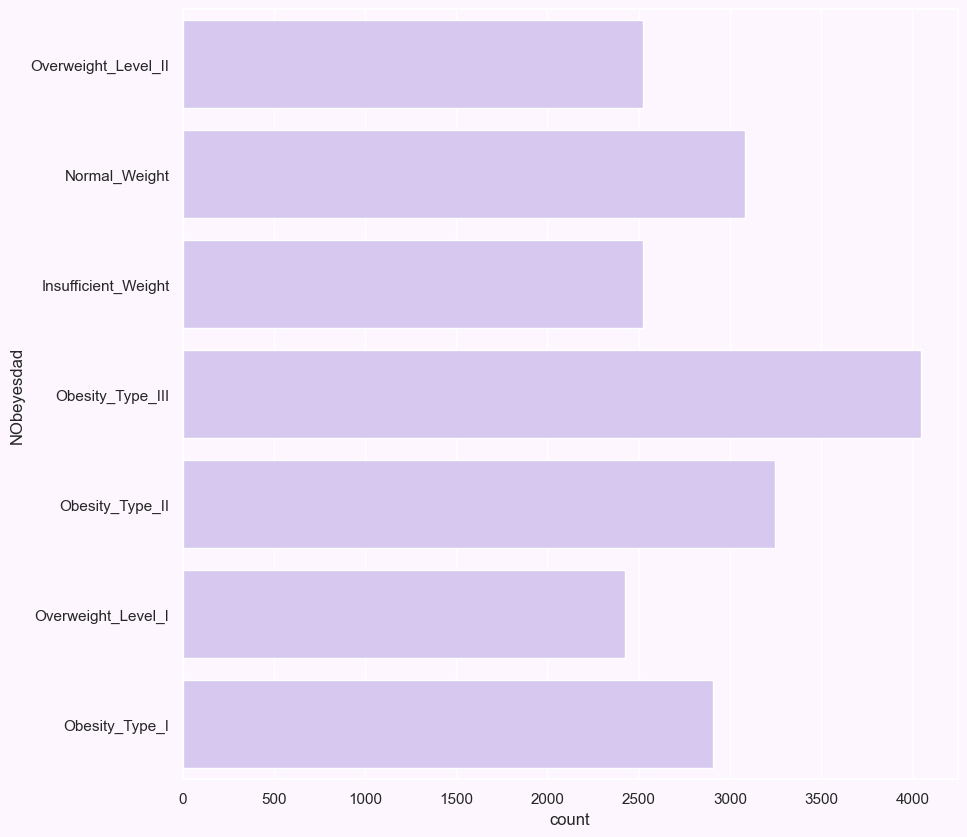

In [47]:
plt.figure(figsize=(10, 10))
sns.set_theme(rc={'axes.facecolor':'#fdf6ff', 'figure.facecolor':'#fdf6ff'})
sns.countplot(df['NObeyesdad'], color='#d6c2f5')
#sns.tick_params(axis='x', rotation=45)
plt.show()

The values are not imbalanced, however slightly more people have Obesity_Type_III.

## 4. Features' analysis

### 4.1. Categorial features brakdown

In [48]:
#unique values in each column
for col in cat_cols:
    print(col, df[col].unique())

Gender ['Male' 'Female']
family_history_with_overweight ['yes' 'no']
FAVC ['yes' 'no']
CAEC ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['Sometimes' 'no' 'Frequently']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


### 4.2. Encoding
Let's see what is encoded into what.

In [49]:
CAEC_dict = {'no': 0, 'Sometimes': 0.33, 'Frequently': 0.66, 'Always': 1 }
CALC_dict = {'no': 0, 'Sometimes': 0.5, 'Frequently': 1}

X_train['CAEC'] = X_train['CAEC'].map(CAEC_dict)
X_train['CALC'] = X_train['CALC'].map(CALC_dict)
X_test['CAEC'] = X_test['CAEC'].map(CAEC_dict)
X_test['CALC'] = X_test['CALC'].map(CALC_dict)
X_val['CAEC'] = X_val['CAEC'].map(CAEC_dict)
X_val['CALC'] = X_val['CALC'].map(CALC_dict)
cat_cols2 = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

In [50]:
#change categorical columns to numerical
le = LabelEncoder()

encoding_mapping = {}
for col in cat_cols2:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])
    X_val[col] = le.fit_transform(X_val[col])

    encoding_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

for col, mapping in encoding_mapping.items():
    print(f"Encoding mapping for column '{col}':")
    print(mapping)
    print()

Encoding mapping for column 'Gender':
{'Female': 0, 'Male': 1}

Encoding mapping for column 'family_history_with_overweight':
{'no': 0, 'yes': 1}

Encoding mapping for column 'FAVC':
{'no': 0, 'yes': 1}

Encoding mapping for column 'SMOKE':
{'no': 0, 'yes': 1}

Encoding mapping for column 'SCC':
{'no': 0, 'yes': 1}

Encoding mapping for column 'MTRANS':
{'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}



As we can see, the encoding transalates the features in an understandable way (0 - flase, 1 - true).

### 4.3. Distributions of numerical featrues

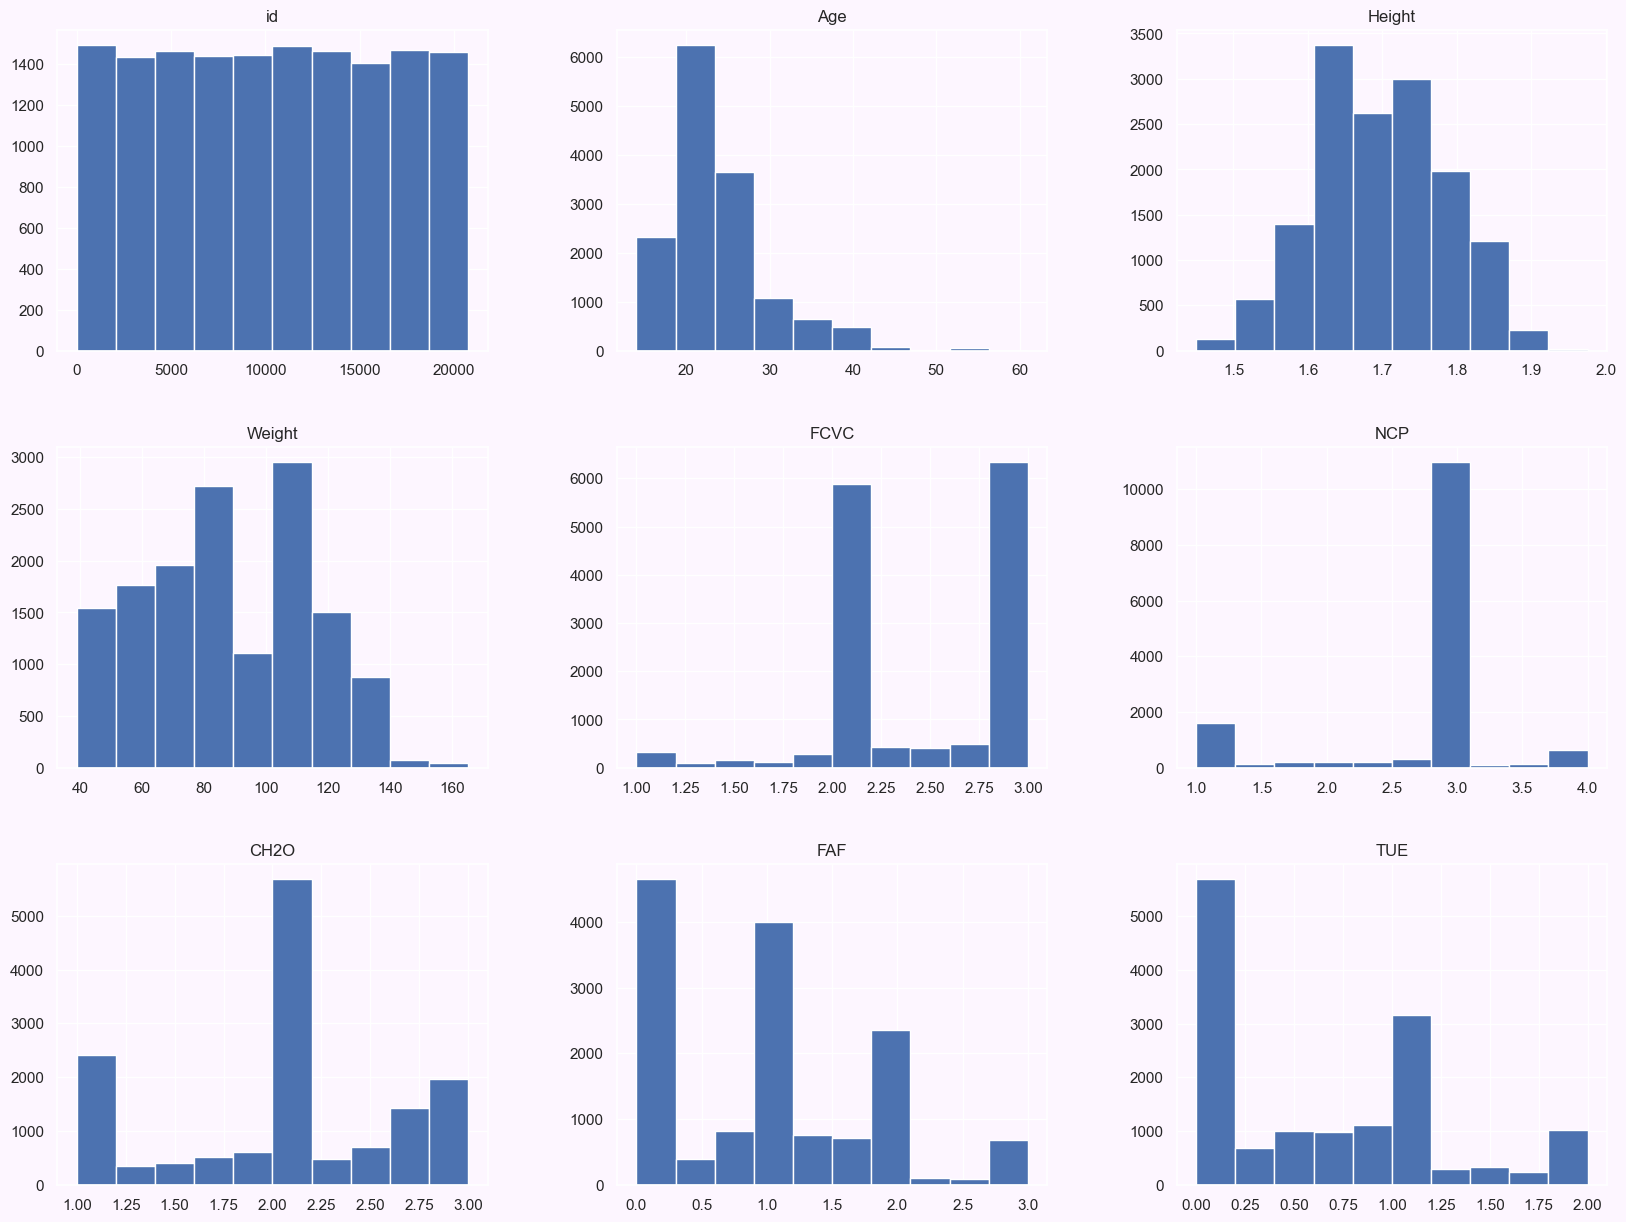

In [51]:
# histograms of the numerical columns without cat_cols
X_train.drop(cat_cols, axis=1).hist(figsize=(20, 15))
plt.show()

Conclusions:
- id is just id, it will not provide anything new to the model
- distributions are not classical (only height resembles normal distribution)  

### 4.4. Correlations
### 4.4.1. Pearson Correlation

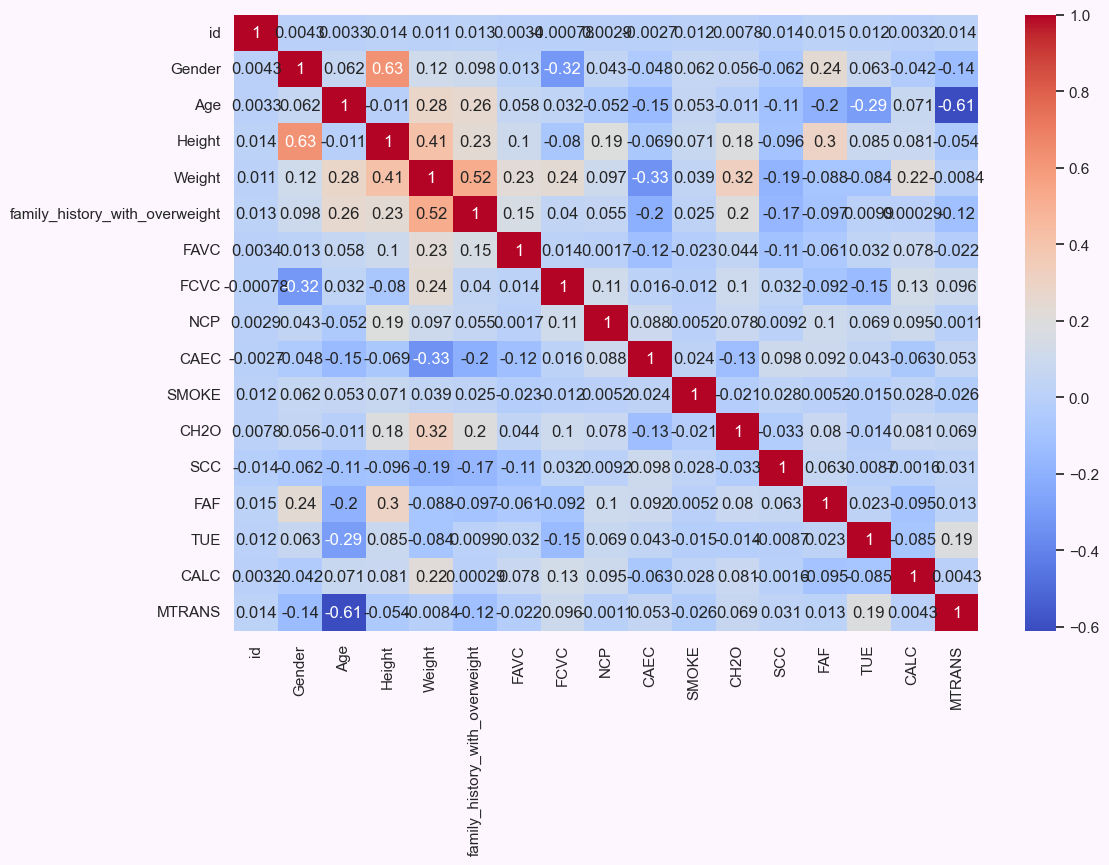

In [52]:
# pearson correlation 
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()

### 4.4.2. Spearman correlation

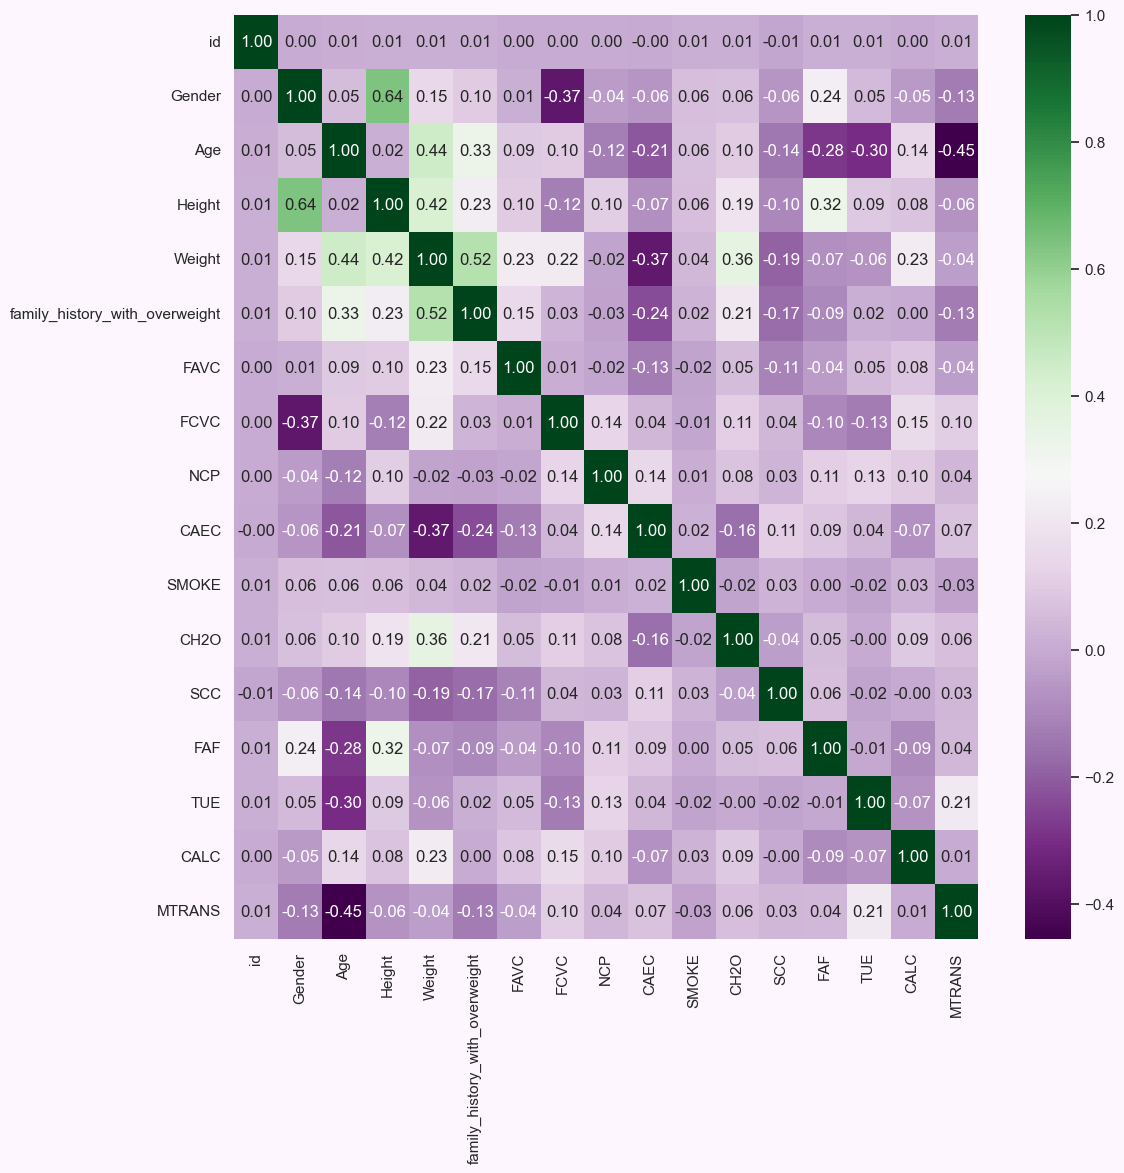

In [55]:
# spearman correlation
plt.figure(figsize=(12, 12))
sns.heatmap(X_train.corr(method='spearman'), annot=True, cmap='PRGn', fmt=".2f")
plt.show()

Conclusions:
- matrices are super similar,
- there is a correlation (not so high - ~0.50) between age and mean of tranport, gender and height, weight and height, but it doesn't bring new thoughts to the model,
- the correletion between family overweight history and weight (0.52 in both Pearson and Spearman) may be important in our project

### 4.5. Pairplot of numerical features
We are using train dataframe instead of X_train, since we need the target class.

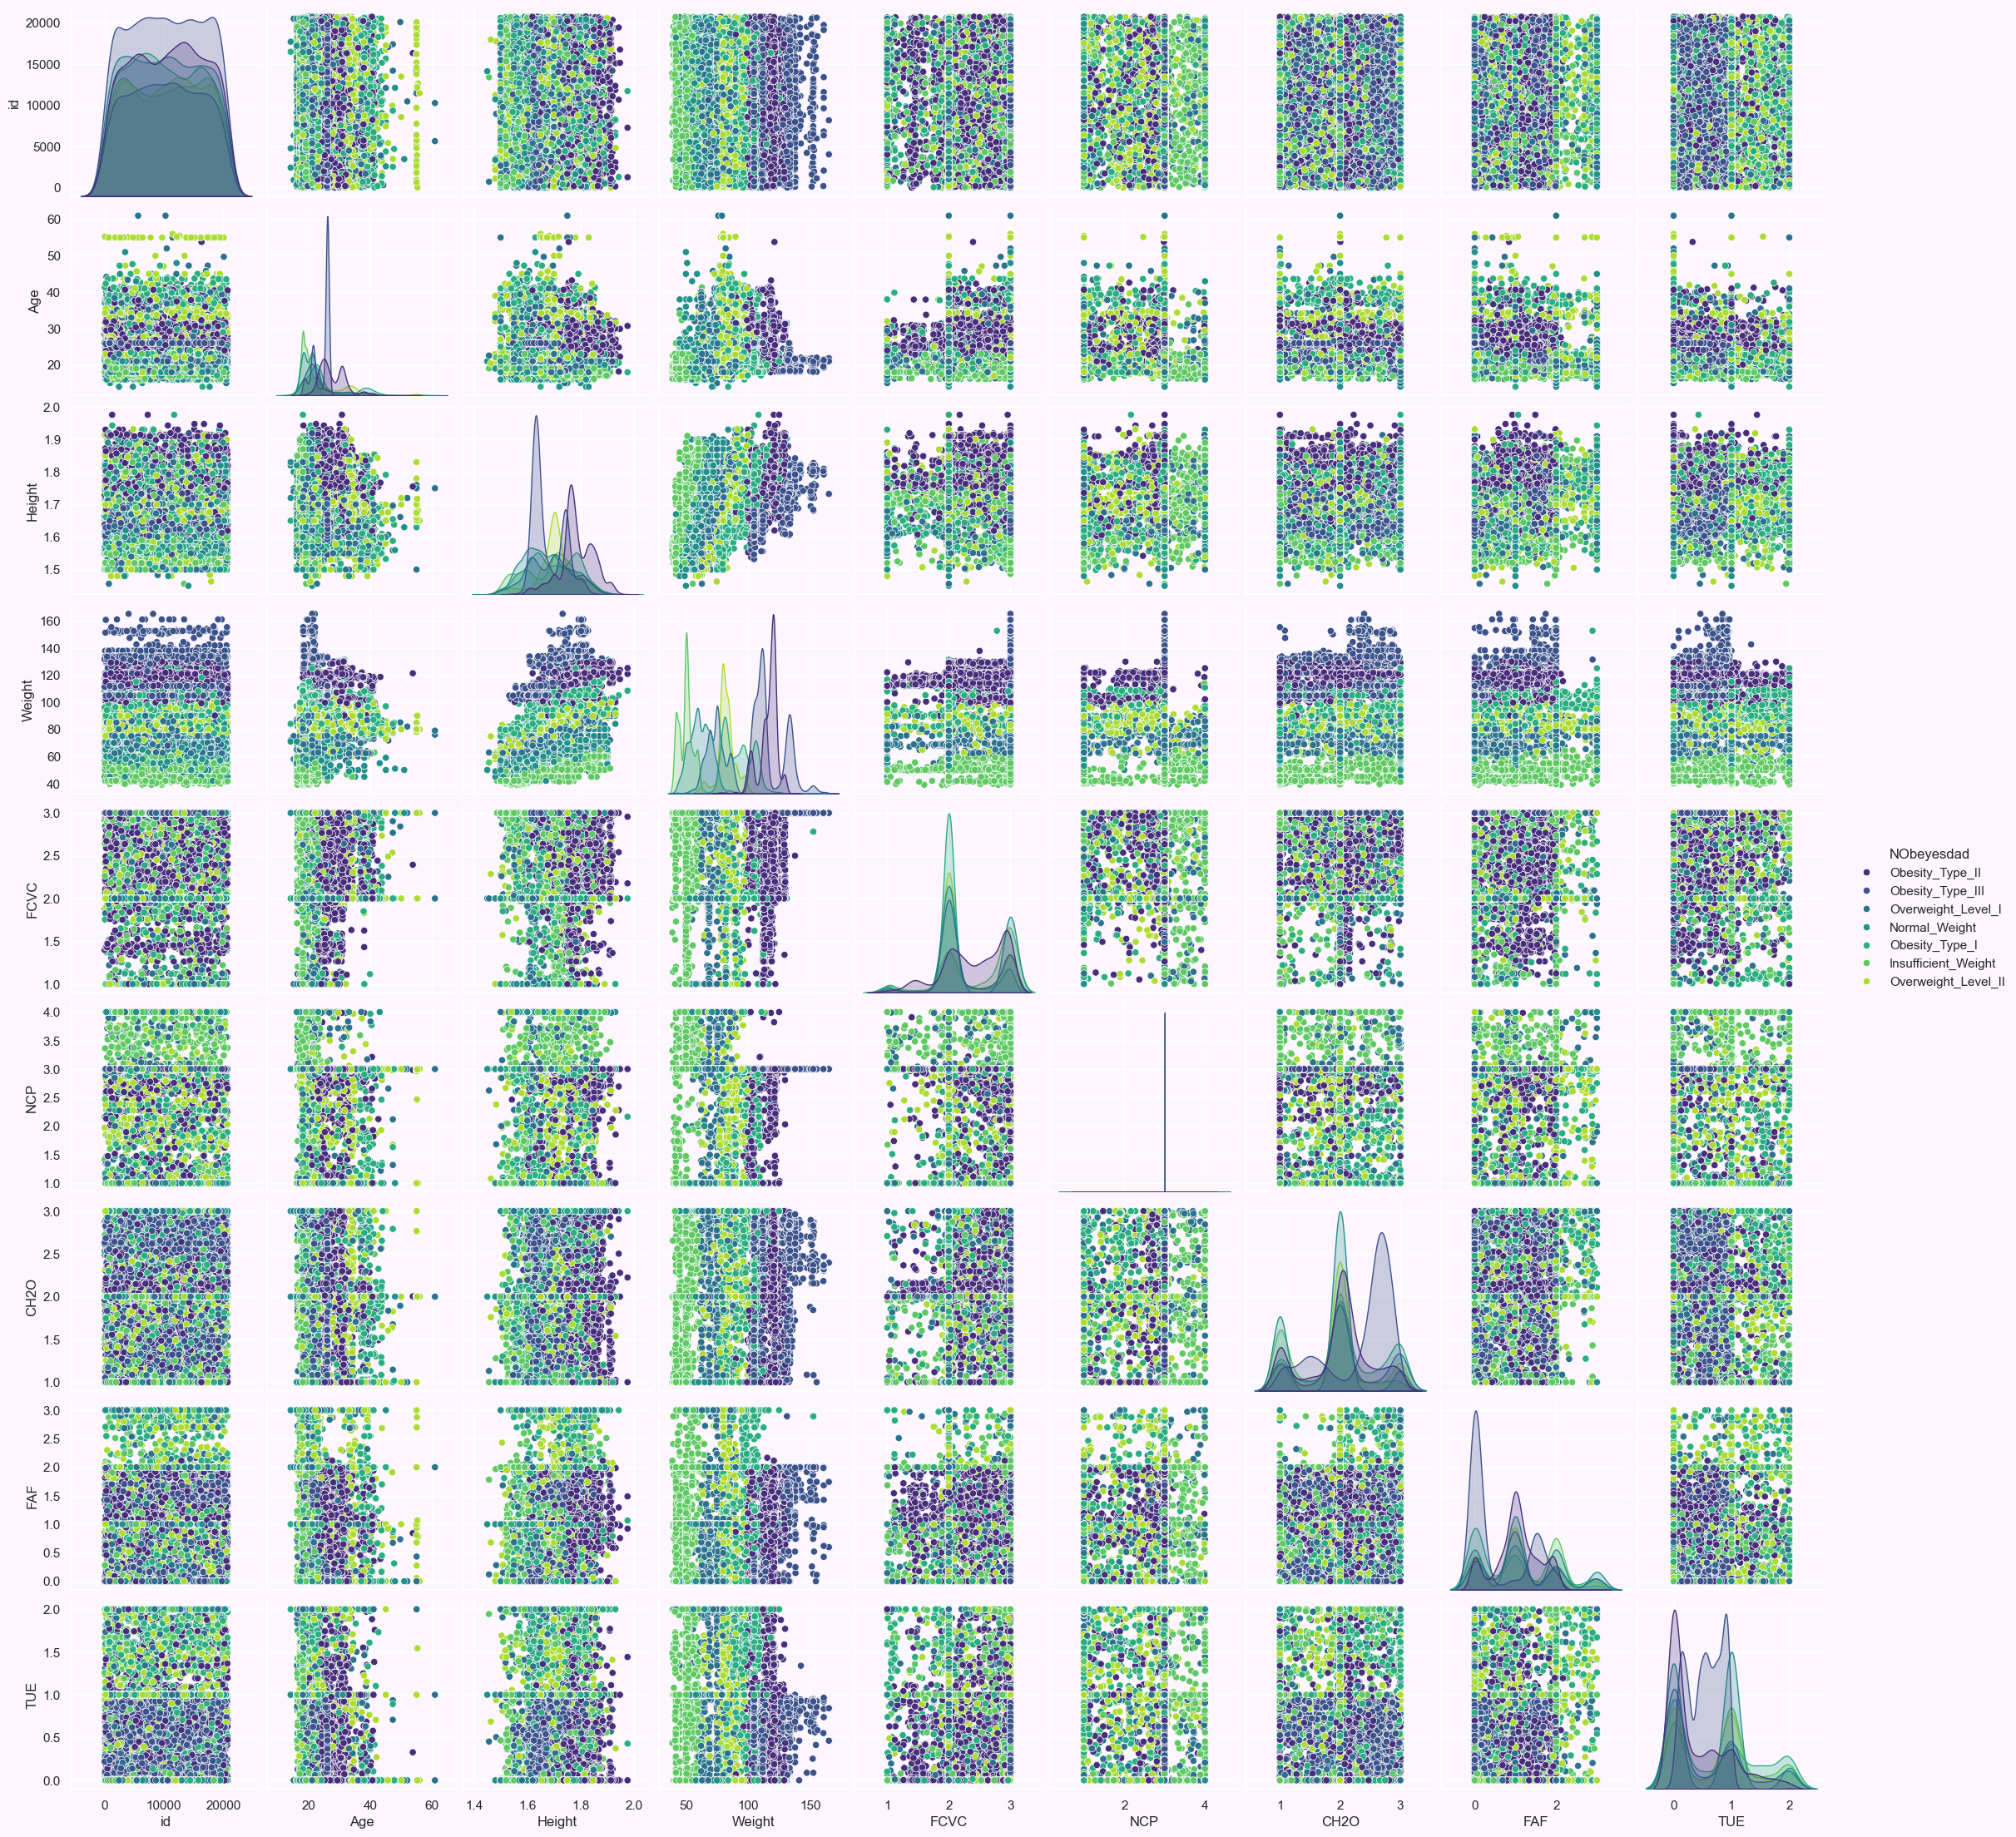

In [63]:
sns.pairplot(train, hue='NObeyesdad', palette='viridis')

Conclusions:
- no idea

### 4.6. Categorical features

In [ ]:
# join X_train and y_train
train_joined = X_train.copy()
train_joined['NObeyesdad'] = y_train

target_col = 'NObeyesdad'


# Generate tables of percentages for each feature
for col in cat_cols + [target_col]:
    table = train_joined.groupby([col, target_col]).size().unstack()
    table = table.div(table.sum(axis=1), axis=0) * 100
    table.columns.name = None  # Remove the name of the columns
    print(f"Feature: {col}:")
    print(table)
    print()

Feature: Gender:
                0          1          2          3          4          5  \
Gender                                                                     
0       15.638706  15.844298  12.225877   0.082237  38.856908  10.074013   
1        8.667404  14.086259  16.035388  30.923417   0.055294  13.256843   

                6  
Gender             
0        7.277961  
1       16.975394  

Feature: family_history_with_overweight:
                                        0          1          2          3  \
family_history_with_overweight                                               
0                               38.961538  34.884615   1.230769   0.076923   
1                                6.328583  10.628667  16.932104  18.784577   

                                       4          5          6  
family_history_with_overweight                                  
0                                    NaN  19.653846   5.192308  
1                               23.79715   9.916

## 5. Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### baseline?
randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=1000, criterion='gini') #gini najlepiej dziala
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
print(classification_report(y_val, y_pred), '\n')
print(random_forest.score(X_val, y_val))

[[478  43   0   0   0   3   1]
 [ 21 562   0   0   0  33   8]
 [  2   1 521  20   3  17  40]
 [  0   0  13 697   2   0   2]
 [  1   0   0   1 834   1   0]
 [  1  53  16   0   0 398  64]
 [  0  12  35   5   0  43 428]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       525
           1       0.84      0.90      0.87       624
           2       0.89      0.86      0.88       604
           3       0.96      0.98      0.97       714
           4       0.99      1.00      1.00       837
           5       0.80      0.75      0.78       532
           6       0.79      0.82      0.80       523

    accuracy                           0.90      4359
   macro avg       0.89      0.89      0.89      4359
weighted avg       0.90      0.90      0.90      4359
 

0.8988300068823124
